In [6]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pylab as plt

In [7]:
#Loading Pima Indian Diabetes Dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Training model on Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

#Making prediction on the test data
y_pred = model.predict(X_test)

In [ ]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_test,y_pred)
class_rep = classification_report(y_test,y_pred)

print(f"Accuracy Score: {accuracy}\nConfusion Matrix: {con_mat}\nClassification Report: {class_rep}")

Accuracy Score: 0.7467532467532467
Confusion Matrix: [[78 21]
 [18 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



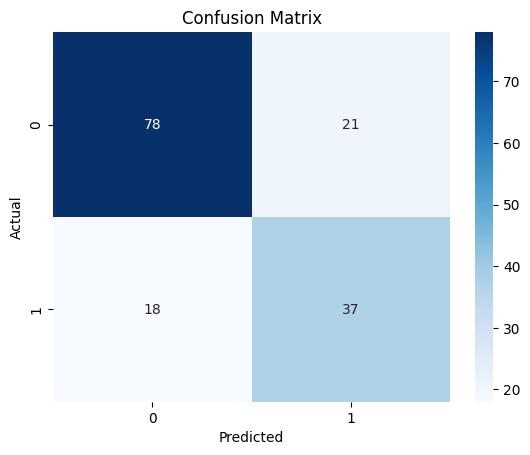

In [ ]:
#Visualization
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# Function to predict using user input
def user_input_data(pg, gl, bp, st, il, bm, dp, ag):
    new_data = pd.DataFrame({
        'Pregnancies': [pg],
        'Glucose': [gl],
        'BloodPressure': [bp],
        'SkinThickness': [st],
        'Insulin': [il],
        'BMI': [bm],
        'DiabetesPedigreeFunction': [dp],
        'Age': [ag]
    })

    predicted_result = model.predict(new_data)
    return predicted_result


#Function to get the data input from the user into a proper format
def get_user_input():
    print("Please enter the following details:\n")

    try:
        pg = int(input("🍼 Pregnancies (0 or more): "))
        gl = int(input("🩸 Glucose Level (e.g., 85–200): "))
        bp = int(input("💓 Blood Pressure Level (mm Hg): "))
        st = int(input("📏 Skin Thickness (mm): "))
        il = int(input("💉 Insulin Level (mu U/ml): "))
        bm = float(input("⚖️ BMI (e.g., 18.5–50.0): "))
        dp = float(input("🧬 Diabetes Pedigree Function (e.g., 0.2–2.5): "))
        ag = int(input("🎂 Age (years): "))

        return pg, gl, bp, st, il, bm, dp, ag

    except ValueError:
        print("\n❌ Invalid input detected. Please enter numeric values only.\n")
        return get_user_input()


In [14]:
# Collect and predict user input
pg, gl, bp, st, il, bm, dp, ag = get_user_input()
result = user_input_data(pg, gl, bp, st, il, bm, dp, ag)

print(f"\n🔍 Predicted Result: {'🟥 Diabetic' if result == 1 else '🟩 Non Diabetic'}")


Please enter the following details:


🔍 Predicted Result: 🟥 Diabetic
